In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

In [3]:
import os
import yaml
import pandas as pd


In [4]:
data_dir = "data"
all_data = []


In [9]:
for folder_name in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder_name)

    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            if filename.endswith(".yaml"):
                file_path = os.path.join(folder_path, filename)

                try:
                    with open(file_path, 'r') as f:
                        stock_data = yaml.safe_load(f)

                        # Handle both list and dict formats
                        if isinstance(stock_data, list):
                            for entry in stock_data:
                                if "Ticker" in entry:
                                    entry["Symbol"] = entry.pop("Ticker")
                                entry["Month"] = folder_name
                                all_data.append(entry)
                        elif isinstance(stock_data, dict):
                            if "Ticker" in stock_data:
                                stock_data["Symbol"] = stock_data.pop("Ticker")
                            stock_data["Month"] = folder_name
                            all_data.append(stock_data)

                except Exception as e:
                    print(f" Error reading {file_path}: {e}")


In [6]:
stock_df = pd.DataFrame(all_data)


In [22]:
# Clean Symbol in stock_df
stock_df['Symbol'] = stock_df['Symbol'].astype(str).str.strip().str.upper()

# Clean Symbol in sector_df
sector_df['Symbol'] = sector_df['Symbol'].astype(str).str.strip().str.upper()

# Fix sector_df to extract correct symbol (right side after ":")
sector_df['Symbol'] = sector_df['Symbol'].apply(lambda x: x.split(":")[-1].strip())
# Fix sector_df symbols: keep only the symbol after the colon
sector_df['Symbol'] = sector_df['Symbol'].apply(lambda x: x.split(":")[-1].strip().upper())

# Make sure stock_df symbols are cleaned too
stock_df['Symbol'] = stock_df['Symbol'].astype(str).str.strip().str.upper()

# Now perform merge
merged_df = pd.merge(stock_df, sector_df, on="Symbol", how="left")


In [18]:
# Load sector data
sector_df = pd.read_csv("Sector_data - Sheet1.csv")

# Clean column names
sector_df.columns = sector_df.columns.str.strip()
sector_df['Symbol'] = sector_df['Symbol'].astype(str).str.strip().str.upper()

# Merge with stock_df
merged_df = pd.merge(stock_df, sector_df, on="Symbol", how="left")


In [19]:
print("Missing sector values:", merged_df['sector'].isna().sum())
print("Unique symbols in stock_df:", stock_df['Symbol'].nunique())
print("Unique symbols in sector_df:", sector_df['Symbol'].nunique())


Missing sector values: 14200
Unique symbols in stock_df: 50
Unique symbols in sector_df: 50


In [14]:
print("Sample stock_df symbols:")
print(stock_df['Symbol'].sort_values().unique()[:10])

print("\nSample sector_df symbols:")
print(sector_df['Symbol'].sort_values().unique()[:10])


Sample stock_df symbols:
['ADANIENT' 'ADANIPORTS' 'APOLLOHOSP' 'ASIANPAINT' 'AXISBANK' 'BAJAJ-AUTO'
 'BAJAJFINSV' 'BAJFINANCE' 'BEL' 'BHARTIARTL']

Sample sector_df symbols:
['ADANI ENTERPRISES: ADANIGREEN' 'ADANI PORTS & SEZ: ADANIPORTS'
 'APOLLO HOSPITALS: APOLLOHOSP' 'ASIAN PAINTS: ASIANPAINT'
 'AXIS BANK: AXISBANK' 'BAJAJ AUTO: BAJAJ-AUTO'
 'BAJAJ FINANCE: BAJFINANCE' 'BAJAJ FINSERV: BAJAJFINSV'
 'BHARAT ELECTRONICS: BEL' 'BHARTI AIRTEL: AIRTEL']


In [15]:
# Symbols in stock_df but not in sector_df
missing_matches = set(stock_df['Symbol'].unique()) - set(sector_df['Symbol'].unique())
print("\nSymbols in stock_df NOT in sector_df:", missing_matches)

# Vice versa
extra_symbols = set(sector_df['Symbol'].unique()) - set(stock_df['Symbol'].unique())
print("Symbols in sector_df NOT in stock_df:", extra_symbols)



Symbols in stock_df NOT in sector_df: {'DRREDDY', 'HEROMOTOCO', 'ICICIBANK', 'RELIANCE', 'HINDUNILVR', 'M&M', 'BPCL', 'TRENT', 'NTPC', 'ONGC', 'GRASIM', 'ULTRACEMCO', 'POWERGRID', 'BAJAJFINSV', 'INDUSINDBK', 'SUNPHARMA', 'TCS', 'CIPLA', 'TITAN', 'ADANIPORTS', 'SBIN', 'TECHM', 'MARUTI', 'WIPRO', 'JSWSTEEL', 'ITC', 'BEL', 'INFY', 'HINDALCO', 'COALINDIA', 'BAJAJ-AUTO', 'NESTLEIND', 'BRITANNIA', 'TATACONSUM', 'EICHERMOT', 'HDFCLIFE', 'ADANIENT', 'HDFCBANK', 'ASIANPAINT', 'APOLLOHOSP', 'LT', 'BAJFINANCE', 'SBILIFE', 'BHARTIARTL', 'AXISBANK', 'TATASTEEL', 'HCLTECH', 'TATAMOTORS', 'SHRIRAMFIN', 'KOTAKBANK'}
Symbols in sector_df NOT in stock_df: {'APOLLO HOSPITALS: APOLLOHOSP', 'SUN PHARMA: SUNPHARMA', 'HERO MOTOCORP: HEROMOTOCO', 'JSW STEEL: JSWSTEEL', 'BAJAJ AUTO: BAJAJ-AUTO', 'SBI LIFE INSURANCE: SBILIFE', 'NESTLE: NESTLEIND', 'HINDALCO: HINDALCO', 'ITC: ITC', 'TATA STEEL: TATASTEEL', 'ULTRATECH CEMENT: ULTRACEMCO', 'SBI: SBIN', 'NTPC: NTPC', 'HINDUSTAN UNILEVER: HINDUNILVR', 'ADANI ENTERP

In [16]:
print("Sample row from stock_df for 'SBIN':")
print(stock_df[stock_df['Symbol'] == 'SBIN'].head(1))

print("\nSample row from sector_df for 'SBIN':")
print(sector_df[sector_df['Symbol'] == 'SBIN'].head(1))


Sample row from stock_df for 'SBIN':
    close                 date   high    low    month   open    volume Symbol  \
0  602.95  2023-10-03 05:30:00  604.9  589.6  2023-10  596.6  15322196   SBIN   

     Month  
0  2023-10  

Sample row from sector_df for 'SBIN':
Empty DataFrame
Columns: [COMPANY, sector, Symbol]
Index: []


In [20]:
# Strip and standardize
sector_df['Symbol'] = sector_df['Symbol'].astype(str).str.strip().str.upper()
stock_df['Symbol'] = stock_df['Symbol'].astype(str).str.strip().str.upper()

# Merge again
merged_df = pd.merge(stock_df, sector_df, on="Symbol", how="left")

# Debug
print("Missing sector values:", merged_df['sector'].isna().sum())


Missing sector values: 14200


In [21]:
print("Sample sector_df symbols:")
print(sector_df['Symbol'].unique()[:10])


Sample sector_df symbols:
['ADANI ENTERPRISES: ADANIGREEN' 'ADANI PORTS & SEZ: ADANIPORTS'
 'APOLLO HOSPITALS: APOLLOHOSP' 'ASIAN PAINTS: ASIANPAINT'
 'AXIS BANK: AXISBANK' 'BAJAJ AUTO: BAJAJ-AUTO'
 'BAJAJ FINANCE: BAJFINANCE' 'BAJAJ FINSERV: BAJAJFINSV'
 'BHARAT ELECTRONICS: BEL' 'BHARTI AIRTEL: AIRTEL']


In [23]:
# Merge on cleaned Symbol
merged_df = pd.merge(stock_df, sector_df, on="Symbol", how="left")

# Check again for missing sectors
print("Missing sector values after merge:", merged_df['sector'].isna().sum())


Missing sector values after merge: 1136


In [24]:
unmatched_symbols = stock_df[~stock_df['Symbol'].isin(sector_df['Symbol'])]['Symbol'].unique()
print("Symbols in stock_df not matched in sector_df after cleaning:")
print(unmatched_symbols)


Symbols in stock_df not matched in sector_df after cleaning:
['TATACONSUM' 'BHARTIARTL' 'ADANIENT' 'BRITANNIA']


In [25]:
# Manually map remaining unmatched symbols
manual_sector_map = {
    'TATACONSUM': 'Consumer Goods',
    'BHARTIARTL': 'Telecom',
    'ADANIENT': 'Conglomerate',
    'BRITANNIA': 'Consumer Goods'
}

# Fill missing sectors using manual mapping
merged_df['sector'] = merged_df.apply(
    lambda row: manual_sector_map[row['Symbol']] if pd.isna(row['sector']) and row['Symbol'] in manual_sector_map else row['sector'],
    axis=1
)


In [26]:
missing = merged_df['sector'].isna().sum()
print(f" Missing sector values after final fix: {missing}")


 Missing sector values after final fix: 0


2025-07-31 09:19:19.476 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-31 09:19:19.564 
  command:

    streamlit run C:\ProgramData\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-07-31 09:19:19.565 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-31 09:19:19.593 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-31 09:19:19.594 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
C:\Users\Admin\AppData\Local\Temp\ipykernel_13840\3950410922.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sector_performance.values, y=sec

DeltaGenerator()

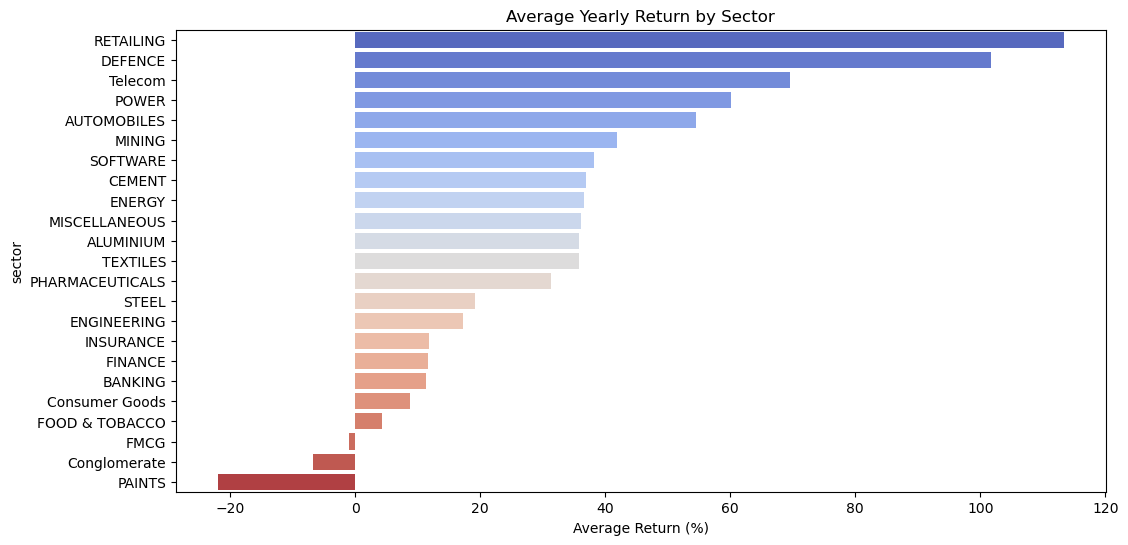

In [27]:
# Prepare the merged DataFrame
df = merged_df.copy()
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by=['Symbol', 'date'])

# Calculate yearly return per stock
returns = df.groupby('Symbol').agg(
    first_close=('close', 'first'),
    last_close=('close', 'last'),
    sector=('sector', 'first')  # Ensure we grab one consistent sector per stock
).reset_index()

returns['yearly_return_pct'] = ((returns['last_close'] - returns['first_close']) / returns['first_close']) * 100

# Sector-wise average return
sector_performance = returns.groupby('sector')['yearly_return_pct'].mean().sort_values(ascending=False)

# 5. Display in Streamlit
st.subheader(" Sector-wise Average Yearly Return")
st.dataframe(sector_performance.reset_index())

# 6. Visualization
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=sector_performance.values, y=sector_performance.index, palette='coolwarm', ax=ax)
ax.set_title("Average Yearly Return by Sector")
ax.set_xlabel("Average Return (%)")
st.pyplot(fig)


In [30]:
# If not already done, convert date to datetime and sort
df = stock_df.copy()
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by=['Symbol', 'date'])

# Calculate yearly return
yearly_price = df.groupby('Symbol').agg(
    first_close=('close', 'first'),
    last_close=('close', 'last')
).reset_index()

yearly_price['return_pct'] = ((yearly_price['last_close'] - yearly_price['first_close']) / yearly_price['first_close']) * 100

# Get Top 10 Gainers and Losers
top_gainers = yearly_price.sort_values(by='return_pct', ascending=False).head(10)
top_losers = yearly_price.sort_values(by='return_pct', ascending=True).head(10)

# Display them
print(" Top 10 Gainers:")
display(top_gainers)

print("\n Top 10 Losers:")
display(top_losers)


 Top 10 Gainers:


,Symbol,first_close,last_close,return_pct
47,TRENT,2059.10,6652.80,223.092613
8,BEL,139.20,280.85,101.760057
30,M&M,1537.40,3012.95,95.976974
5,BAJAJ-AUTO,5016.45,9481.65,89.011153
9,BHARTIARTL,925.30,1569.30,69.599049
35,POWERGRID,199.55,336.95,68.854924
10,BPCL,170.68,285.85,67.477150
20,HEROMOTOCO,3015.60,4794.10,58.976655
40,SUNPHARMA,1141.45,1795.30,57.282404
17,HCLTECH,1238.70,1898.40,53.257447



 Top 10 Losers:


,Symbol,first_close,last_close,return_pct
24,INDUSINDBK,1435.40,998.20,-30.458409
3,ASIANPAINT,3166.85,2472.20,-21.935046
7,BAJFINANCE,7967.60,6683.95,-16.110874
0,ADANIENT,2387.25,2228.00,-6.670856
22,HINDUNILVR,2468.90,2445.25,-0.957916
32,NESTLEIND,2231.52,2247.30,0.707141
28,KOTAKBANK,1727.05,1761.45,1.991836
6,BAJAJFINSV,1561.05,1600.85,2.549566
46,TITAN,3196.25,3308.70,3.518185
31,MARUTI,10346.90,11063.60,6.926712


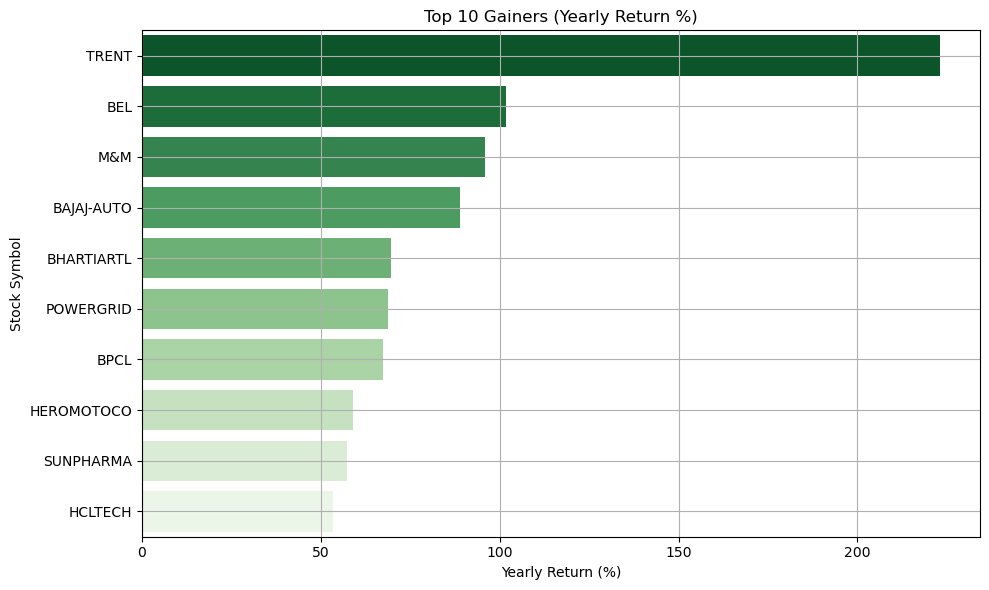

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_gainers, x='return_pct', y='Symbol', hue='Symbol', dodge=False, palette='Greens_r', legend=False)
plt.title("Top 10 Gainers (Yearly Return %)")
plt.xlabel("Yearly Return (%)")
plt.ylabel("Stock Symbol")
plt.grid(True)
plt.tight_layout()
plt.show()


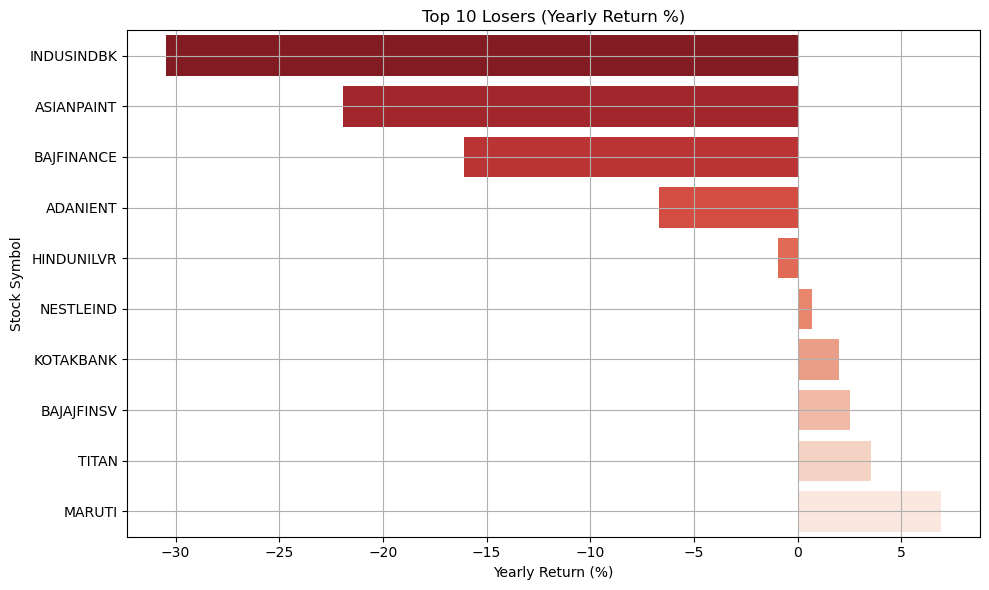

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_losers, x='return_pct', y='Symbol', hue='Symbol', dodge=False, palette='Reds_r', legend=False)
plt.title("Top 10 Losers (Yearly Return %)")
plt.xlabel("Yearly Return (%)")
plt.ylabel("Stock Symbol")
plt.grid(True)
plt.tight_layout()
plt.show()


In [34]:
# Ensure date column is datetime
stock_df['date'] = pd.to_datetime(stock_df['date'])

# Pivot data: rows = dates, columns = symbols, values = closing prices
price_matrix = stock_df.pivot_table(index='date', columns='Symbol', values='close')

# Drop any rows with missing values (optional, or you can fill with method='ffill')
price_matrix = price_matrix.dropna()


In [35]:
correlation_matrix = price_matrix.corr()


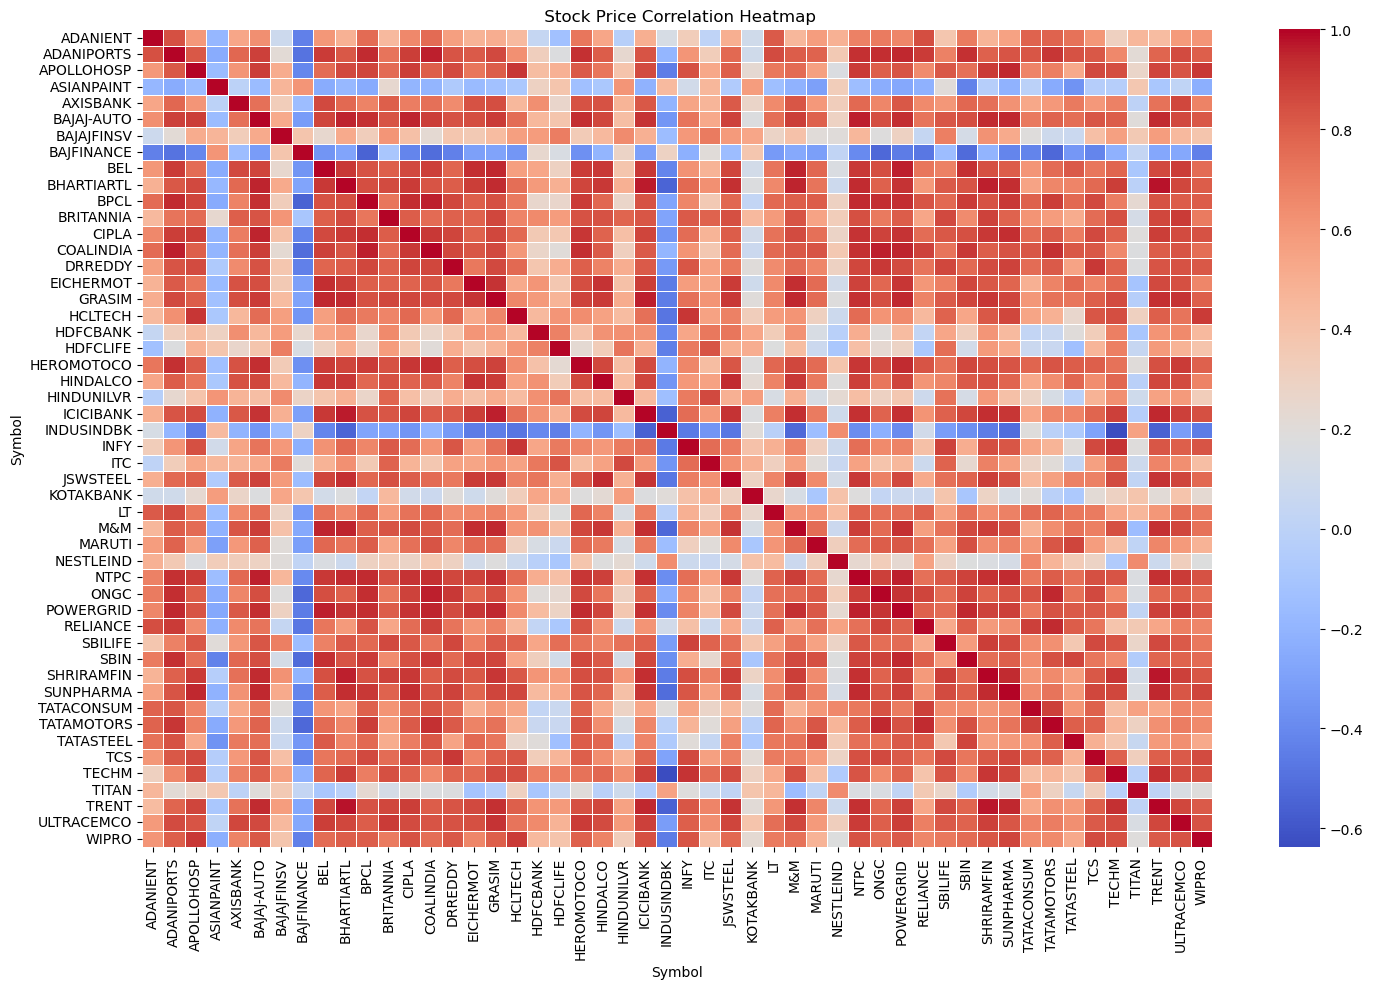

In [36]:
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title(" Stock Price Correlation Heatmap")
plt.tight_layout()
plt.show()


Available months: ['2023-10', '2023-11', '2023-12', '2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06', '2024-07', '2024-08', '2024-09', '2024-10', '2024-11']

 Top 5 Gainers in 2023-10


,Symbol,month,first_close,last_close,return_pct
448,NESTLEIND,2023-10,2231.52,2423.48,8.602208
182,COALINDIA,2023-10,291.90,314.25,7.656732
70,BAJAJ-AUTO,2023-10,5016.45,5314.05,5.932482
518,SBILIFE,2023-10,1292.45,1367.85,5.833881
658,TRENT,2023-10,2059.10,2154.70,4.642805



 Top 5 Losers in 2023-10


,Symbol,month,first_close,last_close,return_pct
602,TATASTEEL,2023-10,128.00,118.75,-7.226562
630,TECHM,2023-10,1216.20,1133.15,-6.828647
532,SBIN,2023-10,602.95,565.55,-6.202836
98,BAJFINANCE,2023-10,7967.60,7492.65,-5.961017
28,APOLLOHOSP,2023-10,5118.95,4819.90,-5.842018


C:\Users\Admin\AppData\Local\Temp\ipykernel_13840\1459594061.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5, x='return_pct', y='Symbol', palette='Greens_r')


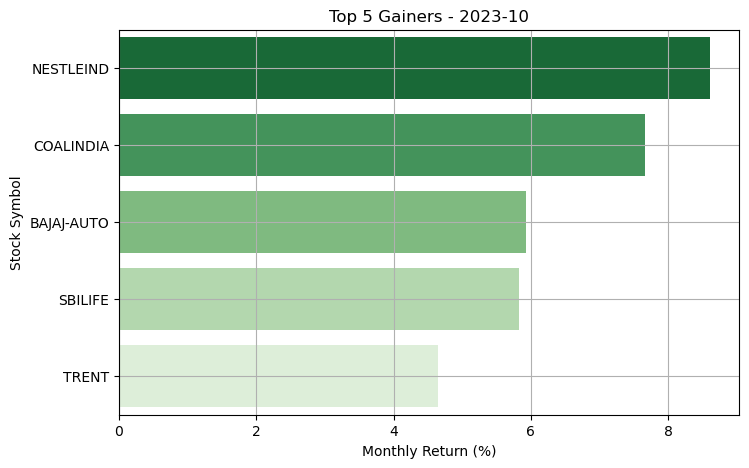

C:\Users\Admin\AppData\Local\Temp\ipykernel_13840\1459594061.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom5, x='return_pct', y='Symbol', palette='Reds_r')


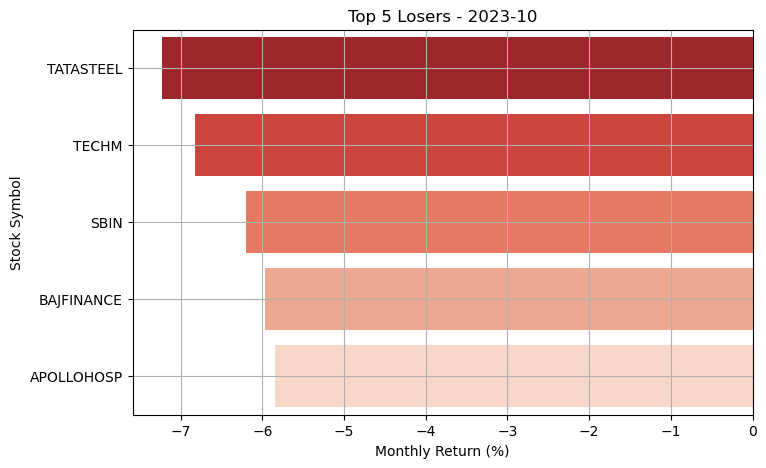

In [37]:
# STEP 5: Top 5 Gainers and Losers (Month-wise)

# Ensure 'date' is datetime and 'stock_df' is available
df = stock_df.copy()
df['date'] = pd.to_datetime(df['date'])

# Extract month
df['month'] = df['date'].dt.to_period('M').astype(str)

# Get first and last close prices per Symbol per Month
monthly_returns = df.groupby(['Symbol', 'month']).agg(
    first_close=('close', 'first'),
    last_close=('close', 'last')
).reset_index()

# Calculate monthly return %
monthly_returns['return_pct'] = (
    (monthly_returns['last_close'] - monthly_returns['first_close']) / monthly_returns['first_close']
) * 100

# View all months available
available_months = sorted(monthly_returns['month'].unique())
print("Available months:", available_months)

# Select a specific month for visualization
selected_month = '2023-10'  # change this to another month like '2024-01'

# Filter the month
monthly_filtered = monthly_returns[monthly_returns['month'] == selected_month]

# Get Top 5 Gainers and Losers
top5 = monthly_filtered.sort_values(by='return_pct', ascending=False).head(5)
bottom5 = monthly_filtered.sort_values(by='return_pct', ascending=True).head(5)

# Show tables
print(f"\n Top 5 Gainers in {selected_month}")
display(top5)

print(f"\n Top 5 Losers in {selected_month}")
display(bottom5)

# Plotting Top 5 Gainers
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(data=top5, x='return_pct', y='Symbol', palette='Greens_r')
plt.title(f"Top 5 Gainers - {selected_month}")
plt.xlabel("Monthly Return (%)")
plt.ylabel("Stock Symbol")
plt.grid(True)
plt.show()

# Plotting Top 5 Losers
plt.figure(figsize=(8, 5))
sns.barplot(data=bottom5, x='return_pct', y='Symbol', palette='Reds_r')
plt.title(f"Top 5 Losers - {selected_month}")
plt.xlabel("Monthly Return (%)")
plt.ylabel("Stock Symbol")
plt.grid(True)
plt.show()


In [38]:
stock_df.to_csv("final_stock_data.csv", index=False)
merged_df.to_csv("final_merged_data.csv", index=False)